In [0]:
# predict closing stock price, using Long Short Term Memory

In [3]:
#Import Libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

Using TensorFlow backend.


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


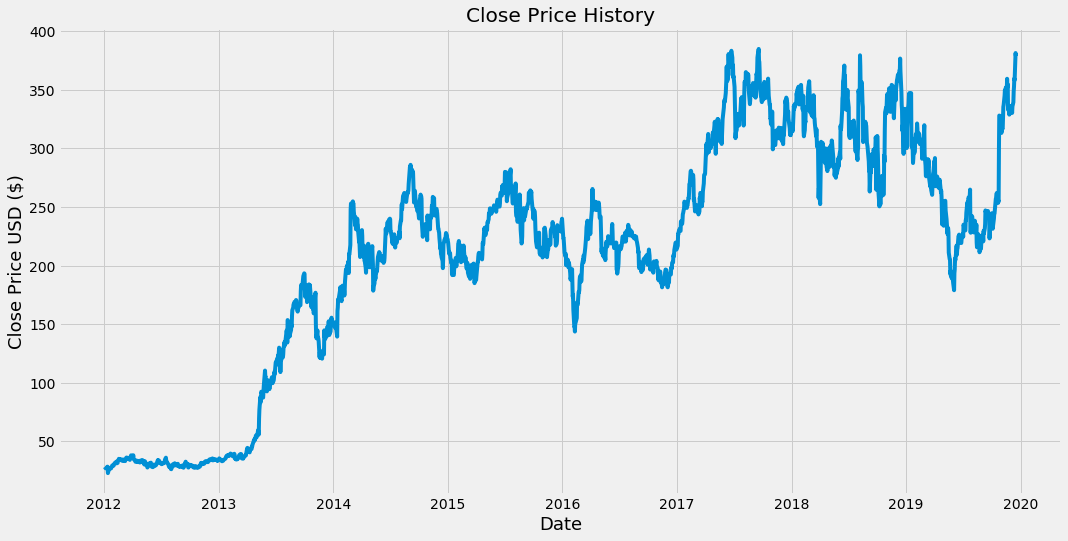

In [4]:
#get the stock quote
df = web.DataReader('TSLA', data_source='yahoo', start='2012-01-01', end='2019-12-17')
#show
df
df.shape
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [5]:
#create new data frome wiht only close column
data = df.filter(['Close'])
#converty the datafrom to numpy array
dataset = data.values
#get number of rows to train the model on
training_data_len = math.ceil(len(dataset) * .8)

training_data_len

1603

In [6]:
#scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.01460478],
       [0.01358328],
       [0.01195439],
       ...,
       [0.92653437],
       [0.9903371 ],
       [0.98340739]])

In [7]:
#create training data set
#create the scaled training data set
train_data = scaled_data[0:training_data_len, :]
#split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i,0])
  if i<= 61:
    print(x_train)
    print(y_train)
    print()

[array([0.01460478, 0.01358328, 0.01195439, 0.01137461, 0.0123133 ,
       0.01333481, 0.01501891, 0.01507413, 0.        , 0.01051876,
       0.01109853, 0.01096049, 0.01051876, 0.0109881 , 0.01278264,
       0.01430109, 0.0169791 , 0.01805582, 0.01871842, 0.01733801,
       0.01874603, 0.02059578, 0.02308053, 0.02487507, 0.02432291,
       0.02523398, 0.02702852, 0.02294249, 0.02401921, 0.0286574 ,
       0.02984456, 0.03144584, 0.0336269 , 0.03232931, 0.03155628,
       0.03241213, 0.03025869, 0.02989978, 0.03042434, 0.02932   ,
       0.03208083, 0.03105933, 0.03031391, 0.02849176, 0.02851936,
       0.02838132, 0.03299191, 0.03649816, 0.03671903, 0.03451037,
       0.03370972, 0.03459319, 0.03365451, 0.03359929, 0.03412385,
       0.03205323, 0.03116977, 0.04033572, 0.04182656, 0.04157808])]
[0.04014246142370134]

[array([0.01460478, 0.01358328, 0.01195439, 0.01137461, 0.0123133 ,
       0.01333481, 0.01501891, 0.01507413, 0.        , 0.01051876,
       0.01109853, 0.01096049, 0.01

In [8]:
#convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

#reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape



(1543, 60, 1)

In [9]:
#build teh LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [10]:
#compile model
model.compile(optimizer='adam', loss='mean_squared_error')

In [24]:
model.fit(x_train, y_train, batch_size=1, epochs=5)


Epoch 1/5
1543/1543 [==============================] - 114s 74ms/step - loss: 5.5266e-04
Epoch 2/5
1543/1543 [==============================] - 114s 74ms/step - loss: 5.1387e-04
Epoch 3/5
1543/1543 [==============================] - 114s 74ms/step - loss: 4.9356e-04
Epoch 4/5
1543/1543 [==============================] - 114s 74ms/step - loss: 4.9083e-04
Epoch 5/5
1543/1543 [==============================] - 113s 73ms/step - loss: 4.3704e-04


In [0]:
#create the testing data set
#create a enw array containing scaled values from index 1543 to 2003
test_data = scaled_data[training_data_len - 60: , :]
#create data sets x_test and y_tests
x_test = []
y_test = dataset[training_data_len:, :]
for i in range( 60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [0]:
#convert data to numpy array
x_test = np.array(x_test)

In [0]:
#reshape data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [0]:
#get models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [30]:
#get root mean squared error(RMSE)
rmse = np.sqrt(np.mean(predictions - y_test) **2)
rmse

0.607443962097168

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


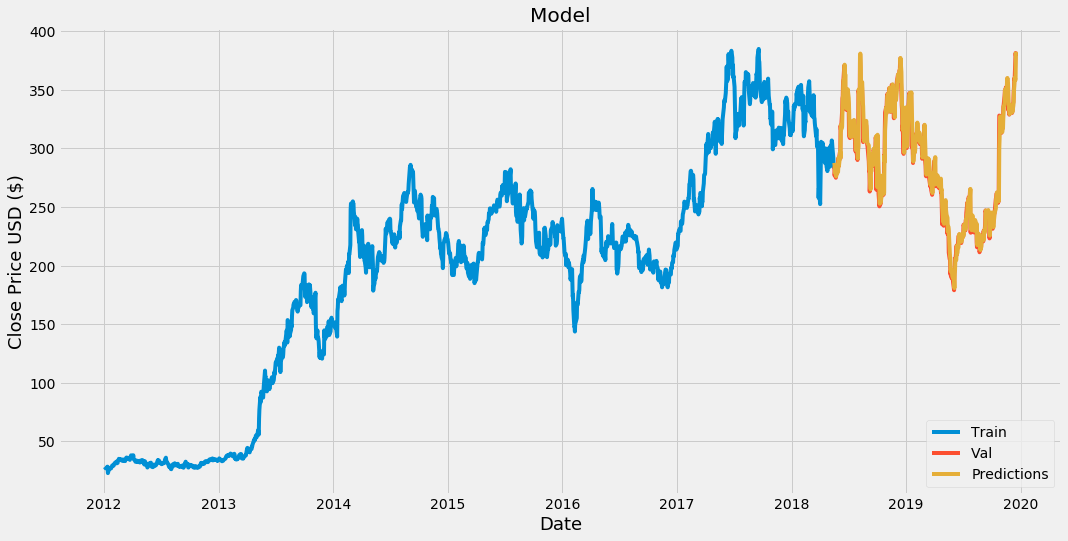

In [31]:
#plot data 
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#visualize
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')

In [32]:
valid

,Close,Predictions
Date,,
2018-05-17,284.540009,287.695190
2018-05-18,276.820007,285.664368
2018-05-21,284.489990,278.231201
2018-05-22,275.010010,285.554260
2018-05-23,279.070007,276.197693
...,...,...
2019-12-11,352.700012,349.521667
2019-12-12,359.679993,353.052155
2019-12-13,358.390015,360.203888


In [33]:
#get quote
apple_quote = web.DataReader('TSLA', data_source='yahoo', start='2012-01-01', end='2020-01-15')
#create new data frome
new_df = apple_quote.filter(['Close'])
last_60_days = new_df[-60:].values
last_60_days_scaled = scaler.transform(last_60_days)
#create an empty list
X_test = []
#append past 60 days
X_test.append(last_60_days_scaled)
#converty teh X_test data to a numpy array
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[510.73203]]


In [34]:
apple_quote2 = web.DataReader('TSLA', data_source='yahoo', start='2020-01-15', end='2020-01-15')
print(apple_quote2['Close'])

Date
2020-01-15    518.5
Name: Close, dtype: float64
